<a href="https://colab.research.google.com/github/laurenliz22/Predicting-Tree-Types/blob/master/Forest_Cover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Case" data-toc-modified-id="Business-Case-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Case</a></span></li><li><span><a href="#Data-Import-&amp;-EDA" data-toc-modified-id="Data-Import-&amp;-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Import &amp; EDA</a></span><ul class="toc-item"><li><span><a href="#Resample-Data" data-toc-modified-id="Resample-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Resample Data</a></span></li></ul></li><li><span><a href="#Feature-Engineering-&amp;-Modeling" data-toc-modified-id="Feature-Engineering-&amp;-Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering &amp; Modeling</a></span><ul class="toc-item"><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-Engineering"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Train/Validate/Test-Split" data-toc-modified-id="Train/Validate/Test-Split-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train/Test Split</a></span></li><li><span><a href="#Baseline-Model---Random-Forest-Classifier-with-baseline-parameters" data-toc-modified-id="Baseline-Model---Random-Forest-Classifier-with-baseline-parameters-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Baseline Model - Random Forest Classifier with baseline parameters</a></span></li><li><span><a href="#Model-#1:-Random-Forest" data-toc-modified-id="Model-#1:-Random-Forest-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Model #1: Random Forest</a></span></li><li><span><a href="#Model-#2:-KNN" data-toc-modified-id="Model-#2:-KNN-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Model #2: KNN</a></span></li><li><span><a href="#Model-#3:-Adaboost" data-toc-modified-id="Model-#3:-Adaboost-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Model #3: Adaboost</a></span></li></ul></li><li><span><a href="#Return-to-Random-Forest" data-toc-modified-id="Return-to-Random-Forest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Return to Random Forest</a></span><ul class="toc-item"><li><span><a href="#Feature-engineering/selection---reduce-dimensionality" data-toc-modified-id="Feature-engineering/selection---reduce-dimensionality-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Feature engineering/selection - reduce dimensionality</a></span></li><li><span><a href="#Fit-Model" data-toc-modified-id="Fit-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fit Model</a></span></li></ul></li><li><span><a href="#Final-Model-on-Test-Data" data-toc-modified-id="Final-Model-on-Test-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final Model on Test Data</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Business Case

I am looking into predicting the forest cover type based on the predominant kind of tree cover in the Roosevelt National Forest of Colorado for the purpose of understanding the Forest's ecosystem.  The dataset that is used contains tree observations from four wilderness areas of the Roosevelt National Forest.  This dataset includes information on tree cover type, shadow coverage, wilderness areas, soil type, and local topography.  Based on the data I will develop a model to best predict the forest cover type reflecting the predominant tree coverage in each area as determined by the US Forest Service. 

# Data Import

The first step to analyzing this data is to import it.  I have used google colab for this project.

In [197]:
#Import drive from google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import seaborn as sns
import math
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from xgboost import XGBClassifier

In [199]:
#Import raw dataset
data_raw = pd.read_csv('drive/My Drive/covtype.csv')
print(len(data_raw))
data_raw.head()

581012


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


There are 581,012 data records in the raw dataset

Background on Data: 

The study area includes four wilderness areas located in the Roosevelt National Forest of Colorado. Each tree cover type observation is a 30m x 30m patch.

Target: 
Forest Cover Type (Cover_Type)
* 1 - Spruce/Fir
* 2 - Lodgepole Pine
* 3 - Ponderosa Pine
* 4 - Cottonwood/Willow
* 5 - Aspen
* 6 - Douglas-fir
* 7 - Krummholz

Features:
* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation

The wilderness areas are:
* 1 - Rawah Wilderness Area
* 2 - Neota Wilderness Area
* 3 - Comanche Peak Wilderness Area
* 4 - Cache la Poudre Wilderness Area

The soil types are:

* 1 Cathedral family - Rock outcrop complex, extremely stony.
* 2 Vanet - Ratake families complex, very stony.
* 3 Haploborolis - Rock outcrop complex, rubbly.
* 4 Ratake family - Rock outcrop complex, rubbly.
* 5 Vanet family - Rock outcrop complex complex, rubbly.
* 6 Vanet - Wetmore families - Rock outcrop complex, stony.
* 7 Gothic family.
* 8 Supervisor - Limber families complex.
* 9 Troutville family, very stony.
* 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
* 11 Bullwark - Catamount families - Rock land complex, rubbly.
* 12 Legault family - Rock land complex, stony.
* 13 Catamount family - Rock land - Bullwark family complex, rubbly.
* 14 Pachic Argiborolis - Aquolis complex.
* 15 unspecified in the USFS Soil and ELU Survey.
* 16 Cryaquolis - Cryoborolis complex.
* 17 Gateview family - Cryaquolis complex.
* 18 Rogert family, very stony.
* 19 Typic Cryaquolis - Borohemists complex.
* 20 Typic Cryaquepts - Typic Cryaquolls complex.
* 21 Typic Cryaquolls - Leighcan family, till substratum complex.
* 22 Leighcan family, till substratum, extremely bouldery.
* 23 Leighcan family, till substratum - Typic Cryaquolls complex.
* 24 Leighcan family, extremely stony.
* 25 Leighcan family, warm, extremely stony.
* 26 Granile - Catamount families complex, very stony.
* 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
* 28 Leighcan family - Rock outcrop complex, extremely stony.
* 29 Como - Legault families complex, extremely stony.
* 30 Como family - Rock land - Legault family complex, extremely stony.
* 31 Leighcan - Catamount families complex, extremely stony.
* 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
* 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
* 34 Cryorthents - Rock land complex, extremely stony.
* 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
* 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
* 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
* 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
* 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
* 40 Moran family - Cryorthents - Rock land complex, extremely stony.

Now that my data is imported, I will review the dataset to determine if any cleaning needs to take place.

# Data Cleaning

Detect and correct any inaccurate data records, if needed.

In [200]:
#Review dataset
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

All data types are integers and it does not appear there is any missing data.  However I'll explore this further below.

In [201]:
#Explore if there are any NaN values in the data
data_raw.isna().any().any()

False

There are no NaN values in the dataset.  Next I'll look at the different features included in my dataset

In [202]:
#Review columns
data_raw.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

# Data Exploration

## Target Exploration

I'll review the Target I'm trying to predict (Cover_Type) to see how many of each type are included in the full dataset

In [203]:
#Create new dataframe with an additional column to define Cover_Types
trees = {1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 
         4:'Cottonwood/Willow', 5:'Aspen', 6:'Douglas-fir', 
         7:'Krummholz'}
data = data_raw
data['Cover_Type_2'] = data['Cover_Type'].map(trees)
data.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Cover_Type_2
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ponderosa Pine
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ponderosa Pine
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ponderosa Pine
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ponderosa Pine
581011,2383,165,13,60,4,67,231,244,141,875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ponderosa Pine


In [0]:
#Set colors based on Cover_Type for visualizations
palette = {'Spruce/Fir':'steelblue', 'Lodgepole Pine':'teal', 'Ponderosa Pine':'slateblue',
           'Cottonwood/Willow':'lightgray', 'Aspen':'cadetblue', 'Douglas-fir': 'lightgreen',
           'Krummholz':'lightblue'}

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64


Text(0.5, 1.0, 'Count of Cover Types')

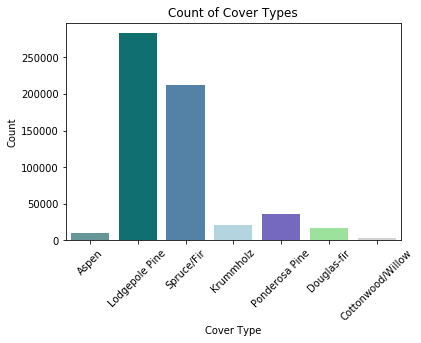

In [217]:
#Review categorical data for classification
print(data.Cover_Type.value_counts())
sns.countplot(x='Cover_Type_2', data=data, palette=palette)
plt.xticks(rotation=45)
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.title('Count of Cover Types')

It appears that there is large variation between the different cover types included in the raw dataset.  After reviewing the data a bit further, I'll resample to "even things out" before running my models.

## Feature Exploration

Next I'll look at the distribution of my features using a histogram.

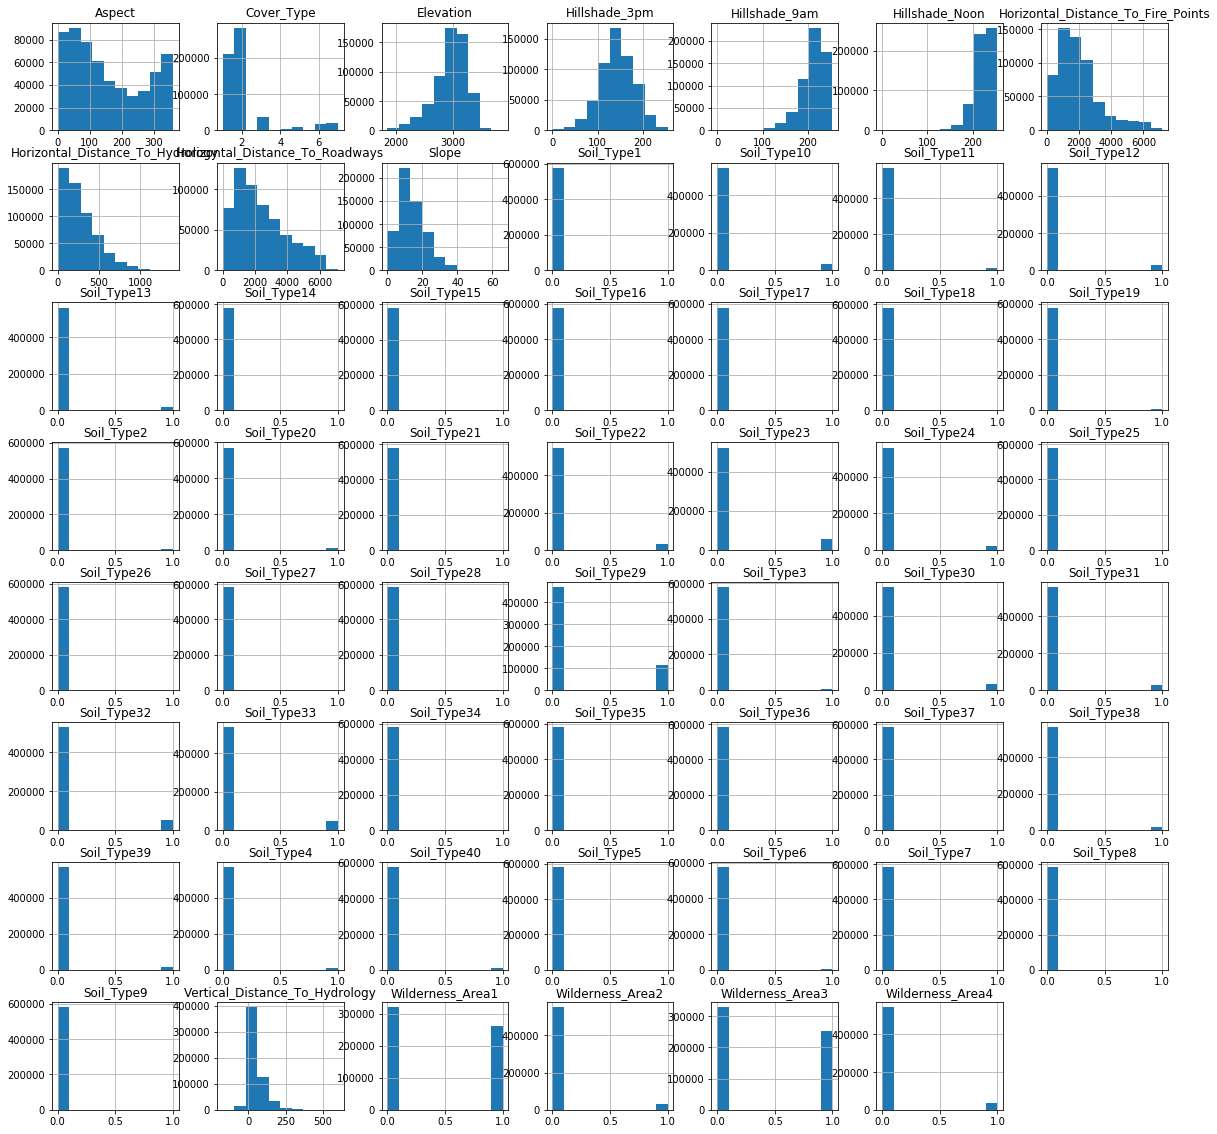

In [97]:
#Look at distribution of data
data_raw.hist(figsize = (20,20));

- Wilderness areas, soil types and cover_type are categorical data.
- All other features are continuous and either right or left skewed, except for aspect.
- Aspect in degrees azimuth dips in the middle, which makes sense as it's a 360 degree measurement.  Azimuth relates to the direction the Sun is facing: North, South, East, or West. Azimuth of 90 degrees corresponds to East. 
- Hillshade_3pm (0-255 index) is actually closer to normalized when looking at the histogram plot.

### Continuous Feature Exploration

I'll look at the continuous data features to determine multicollinearity of features

In [98]:
#Create new dataset for continuous features
cont_data = data_raw.loc[:,['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                        'Horizontal_Distance_To_Fire_Points']]
print(len(cont_data))
cont_data.head()

581012


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


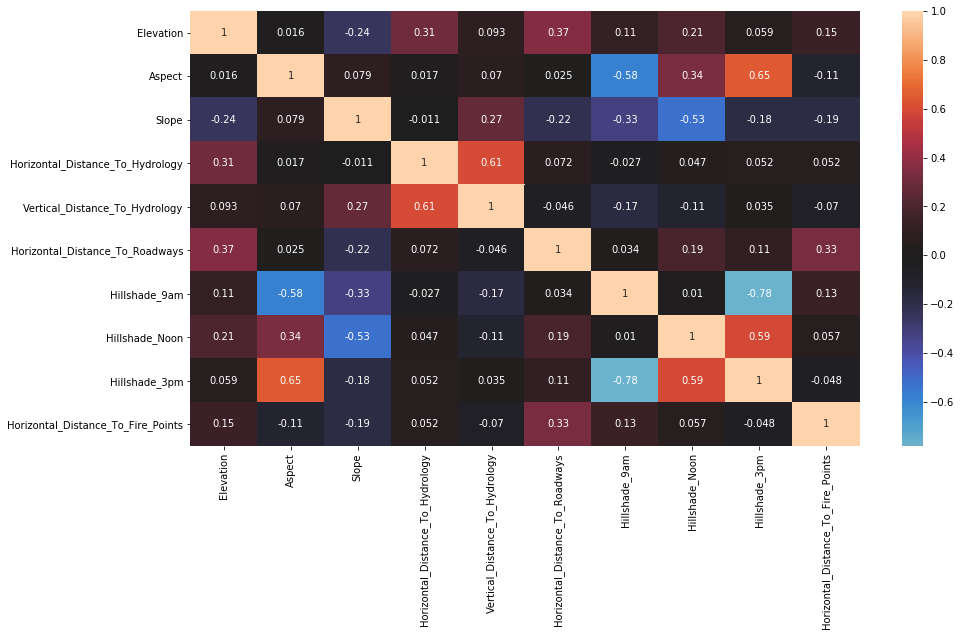

In [99]:
#Create a heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(), center=0, annot=True)

Correlated features:
- Aspect and Hillshade_3pm
- Hillshade_Noon and Hillshade_3pm
- Horizontal_Distance_to_Hydrology and Vertical_Distance_to_Hydrology (makes sense)



I'll look at boxplots for the continuous features to determine which features will be strong predictors for Cover_Type as well as be able to see their distribution


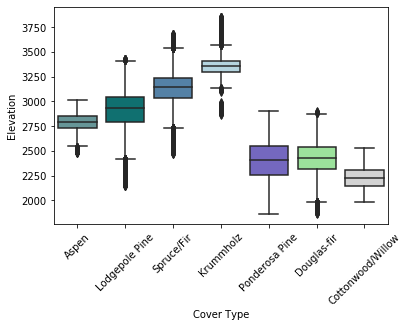

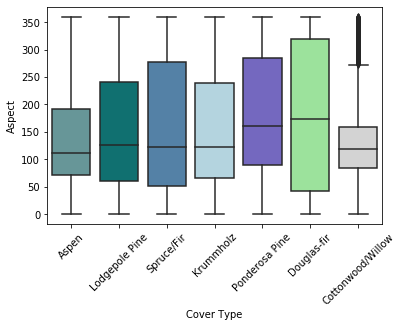

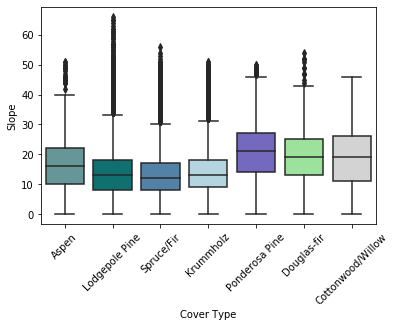

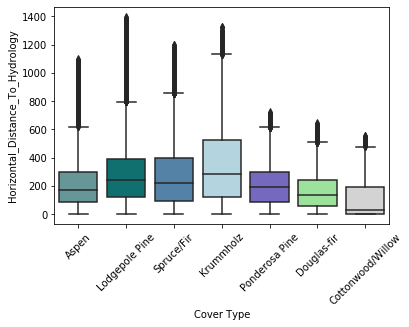

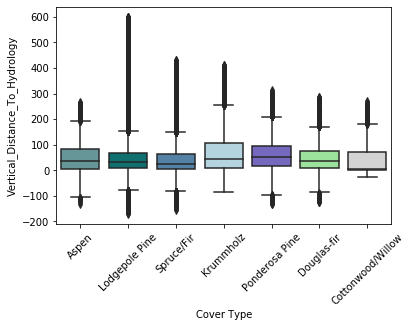

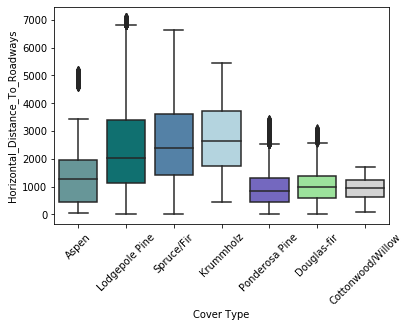

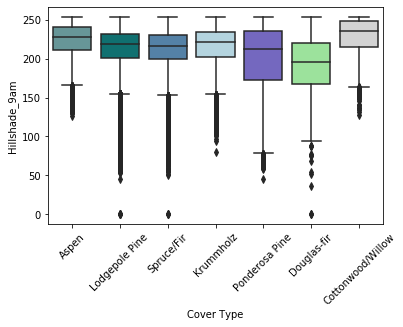

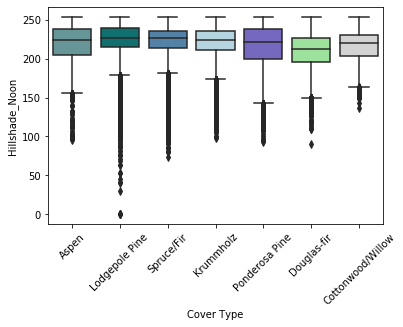

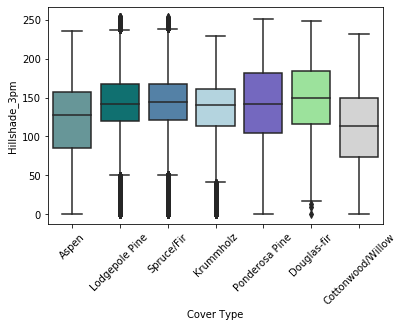

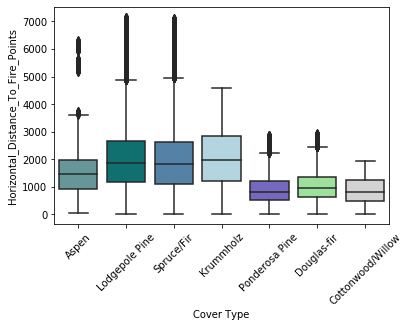

In [218]:
#Create boxplots for continuous features
for feat in cont_features:
    sns.boxplot(x='Cover_Type_2', y=feat, data=data, palette=palette)
    plt.xticks(rotation=45)
    plt.xlabel('Cover Type')
    plt.show()

* Elevation is a very strong predictor of Cover_Type, followed by Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points
* Vertical_Distance_To_Hydrology doesn't have much variation based on cover_type compared to Horizontal_Distance_To_Hydrology

### Categorical Feature Exploration

I'll look at bar charts to review the wilderness area and soil type features and how they are related to Cover_Type

In [222]:
#Review Soil Type
data_soil = data.loc[:,'Soil_Type1':'Soil_Type40']
data_soil.tail()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
581007,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581008,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581011,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Soil_Type1


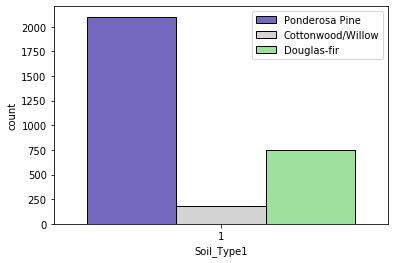

Soil_Type2


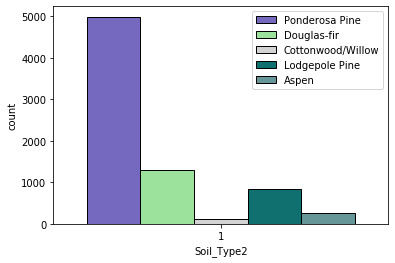

Soil_Type3


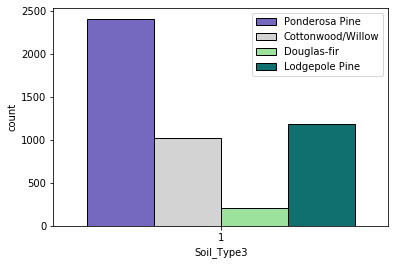

Soil_Type4


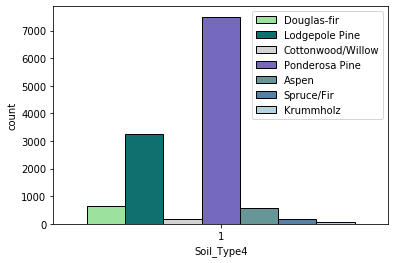

Soil_Type5


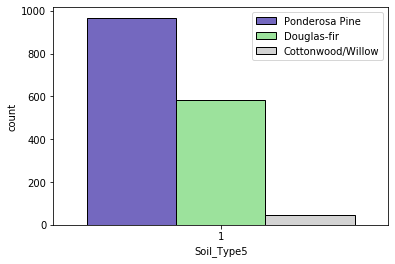

Soil_Type6


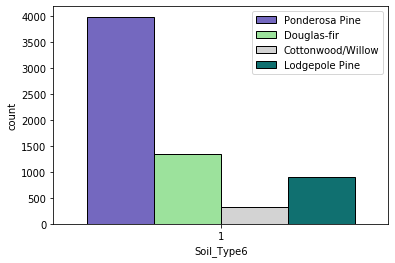

Soil_Type7


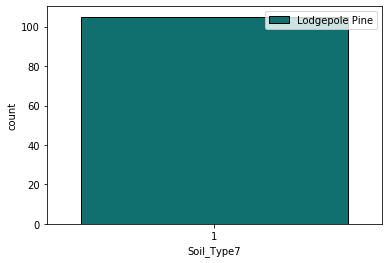

Soil_Type8


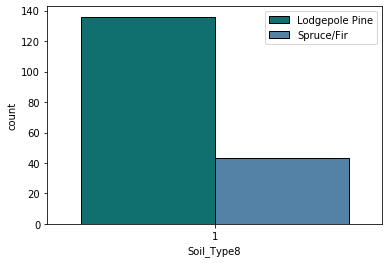

Soil_Type9


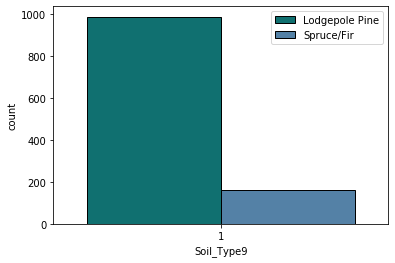

Soil_Type10


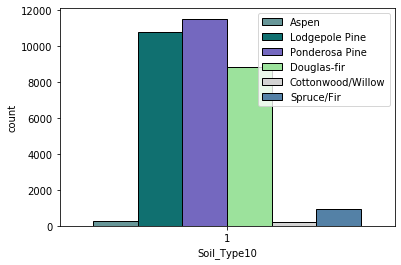

Soil_Type11


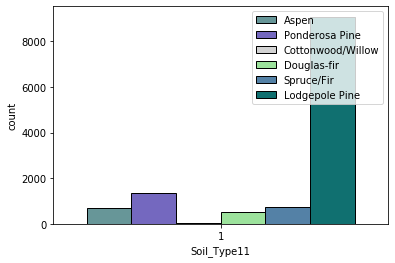

Soil_Type12


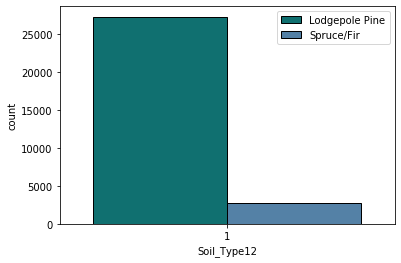

Soil_Type13


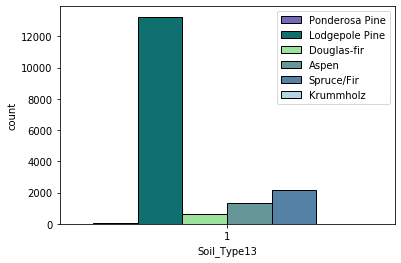

Soil_Type14


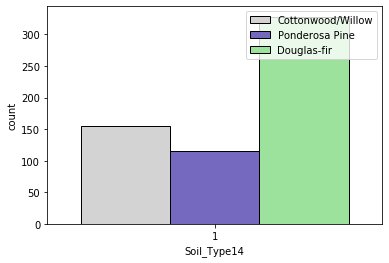

Soil_Type15


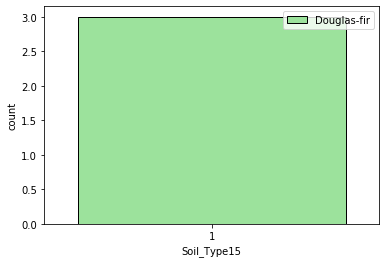

Soil_Type16


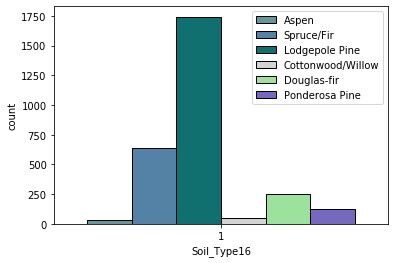

Soil_Type17


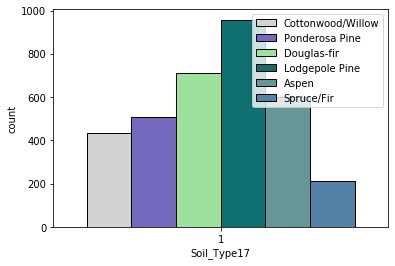

Soil_Type18


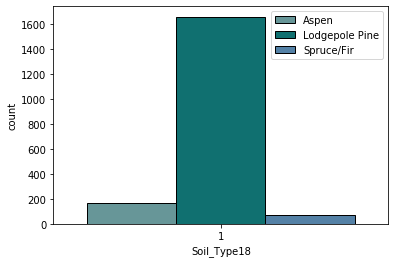

Soil_Type19


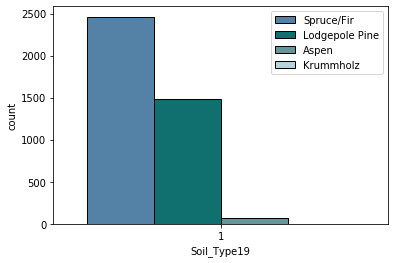

Soil_Type20


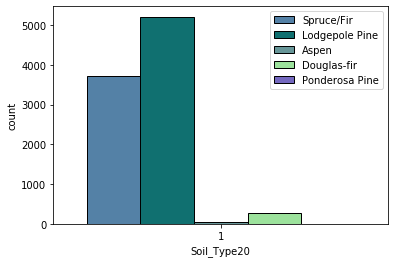

Soil_Type21


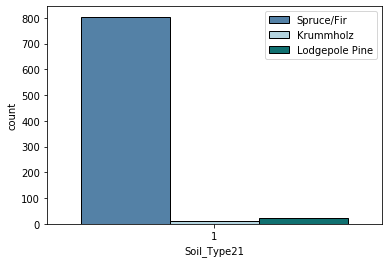

Soil_Type22


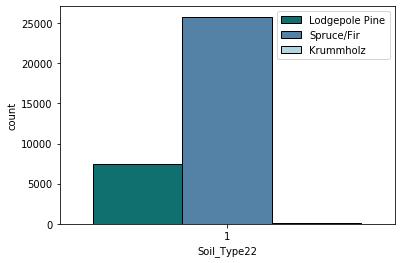

Soil_Type23


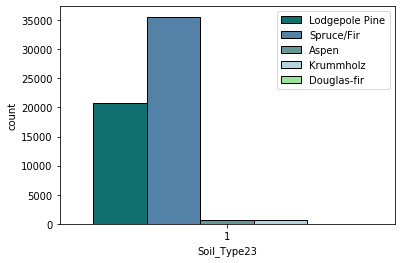

Soil_Type24


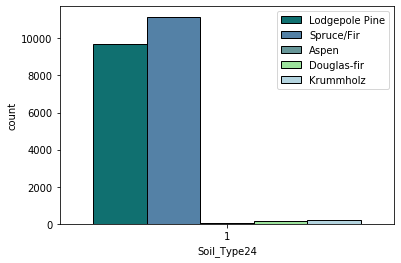

Soil_Type25


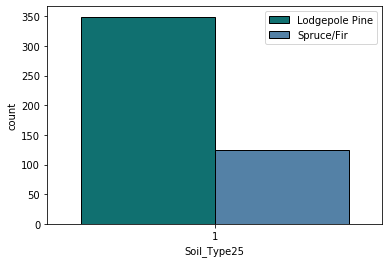

Soil_Type26


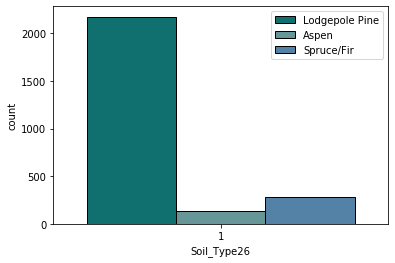

Soil_Type27


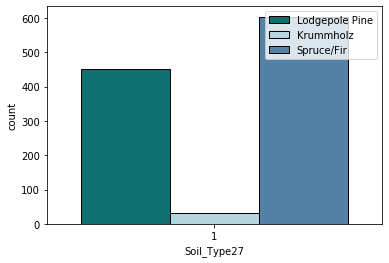

Soil_Type28


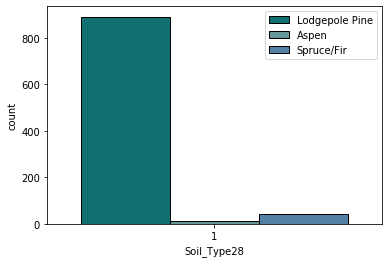

Soil_Type29


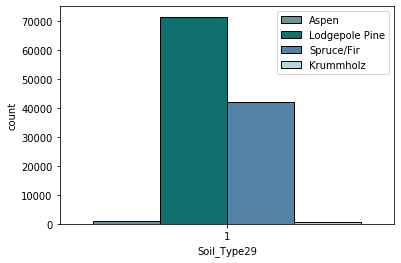

Soil_Type30


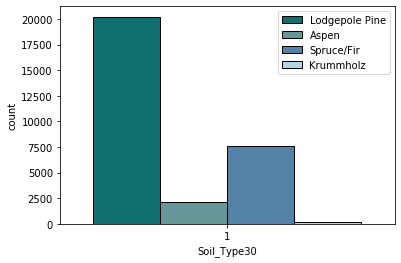

Soil_Type31


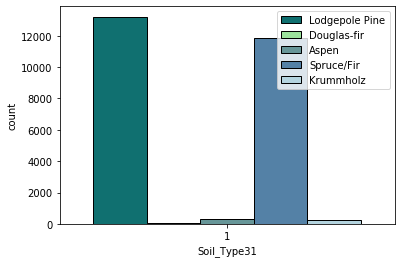

Soil_Type32


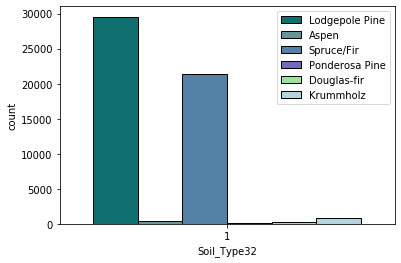

Soil_Type33


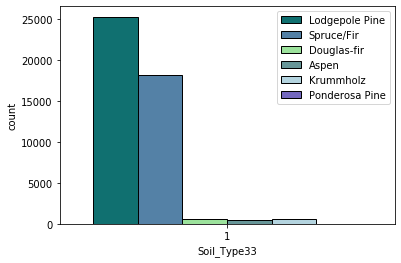

Soil_Type34


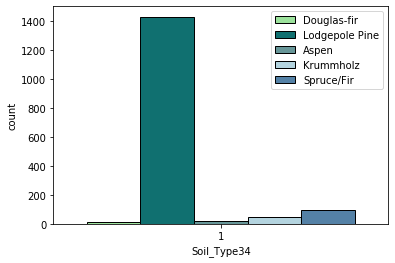

Soil_Type35


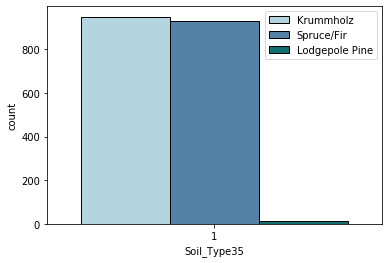

Soil_Type36


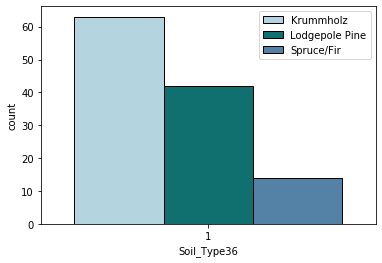

Soil_Type37


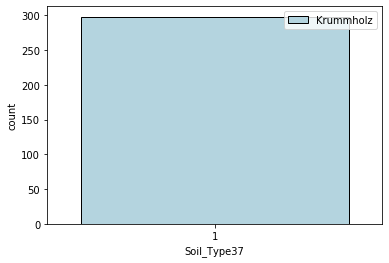

Soil_Type38


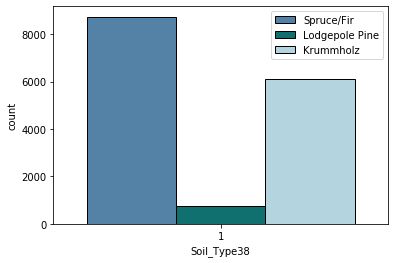

Soil_Type39


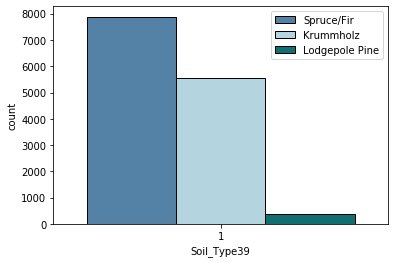

Soil_Type40


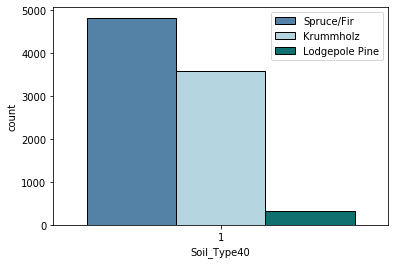

In [223]:
#Create charts to look at soil types
for soil in data_soil.columns:
  if data_soil[soil].sum()>0:
    print(soil)
    sns.countplot(x=soil, hue='Cover_Type_2', data=data.query(soil + '== True'), 
                  palette = palette, linewidth = 1, edgecolor = 'black')
    plt.legend(loc='upper right')
    plt.show()

Some soil types could be a significant predictor of Cover_Type since they are only present within a single Cover_Type.  We do have some soil types that were so small with the raw dataset they may disappear in our resampled data.  This is alright since they weren't a large presence to begin with they wouldn't be a strong predictor. 

In [224]:
#Review Wilderness Area 
data_wild = data.loc[:,'Wilderness_Area1':'Wilderness_Area4']
data_wild.head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


Wilderness_Area1


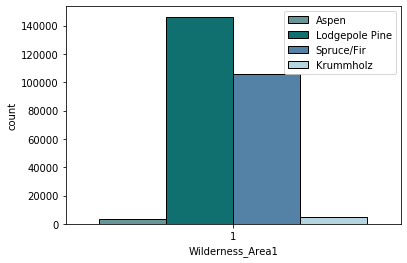

Wilderness_Area2


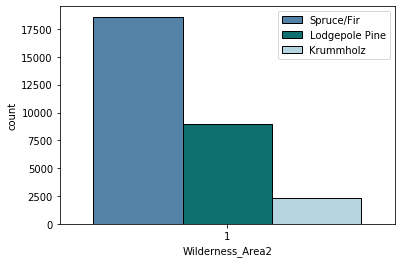

Wilderness_Area3


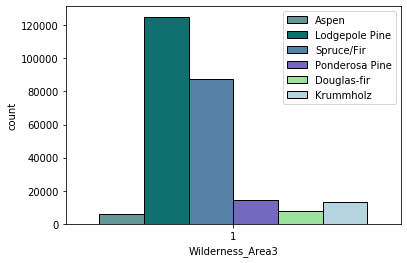

Wilderness_Area4


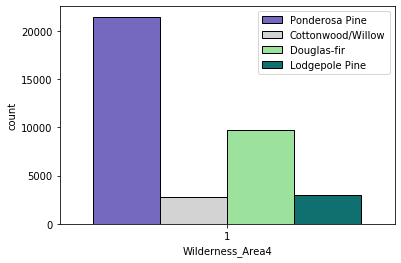

In [225]:
#Create charts to look at wilderness areas 
for wild in data_wild.columns:
    if data_wild[wild].sum()>0:
     print(wild)
     sns.countplot(x=wild, hue='Cover_Type_2', data=data.query(wild + '== True'),
                   palette = palette, linewidth = 1, edgecolor = 'black')
     plt.legend(loc='upper right')
     plt.show()

Here we can see Wilderness area could be a strong prediction of cover type as some areas only have a few trees present while others have all trees.  There's also great variation within the different wilderness areas

# Feature Engineering

## Resample

Since there was such a large variation between the Cover_types I'll resample the dataset using upsampling and downsampling to make them equal for modeling purposes.  I'll also resample so that my raw dataset of almost 600K will be reduced to 50K for ease of modeling.

In [0]:
#Separate different classes
data_ct1 = data[data.Cover_Type == 1]
data_ct2 = data[data.Cover_Type == 2]
data_ct3 = data[data.Cover_Type == 3]
data_ct4 = data[data.Cover_Type == 4]
data_ct5 = data[data.Cover_Type == 5]
data_ct6 = data[data.Cover_Type == 6]
data_ct7 = data[data.Cover_Type == 7]

In [230]:
#Resample data
n = math.ceil(50000 / 7)
data_ct1_downsample = resample(data_ct1, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct2_downsample = resample(data_ct2, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct3_downsample = resample(data_ct3, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct4_upsample = resample(data_ct4, 
                             replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct5_downsample = resample(data_ct5, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct6_downsample = resample(data_ct6, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct7_downsample = resample(data_ct7, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results

data_sampled = pd.concat([data_ct1_downsample, data_ct2_downsample, data_ct3_downsample,
                         data_ct4_upsample, data_ct5_downsample, data_ct6_downsample,
                         data_ct7_downsample])

data_sampled.Cover_Type_2.value_counts()

Aspen                7143
Cottonwood/Willow    7143
Douglas-fir          7143
Spruce/Fir           7143
Lodgepole Pine       7143
Krummholz            7143
Ponderosa Pine       7143
Name: Cover_Type_2, dtype: int64

I now have slightly over 7,000 of each Cover_Type.  I'll recheck the distribution of my sample data to see how it varies from my raw dataset

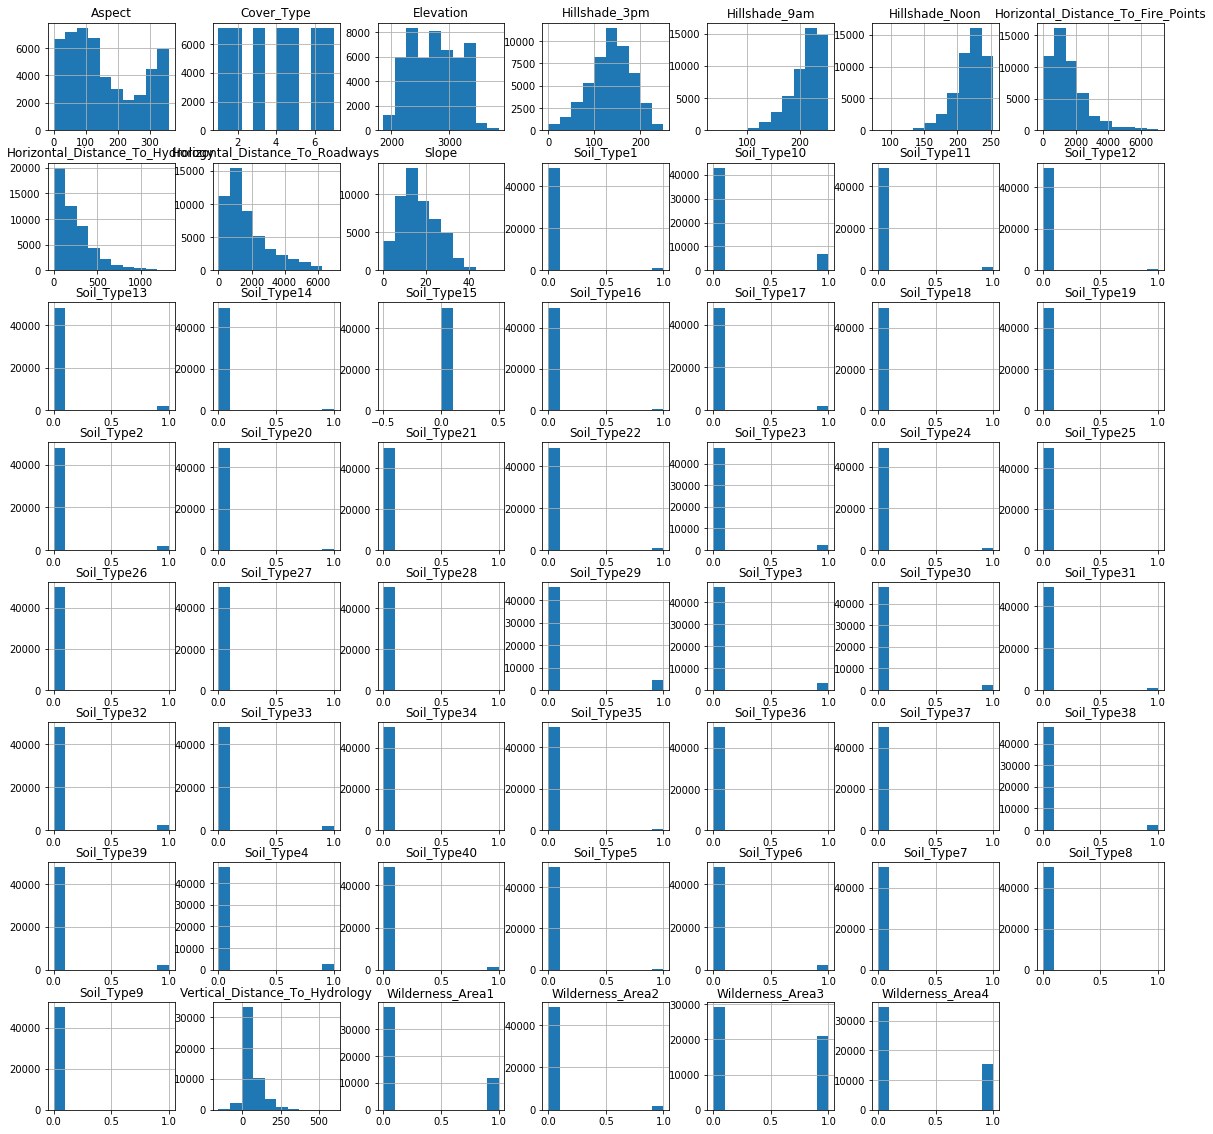

In [231]:
#Look at distribution of sample data
data_sampled.hist(figsize = (20,20));

Comparing distributions the sample population looks similar, except that elevation is a bit more flat than left skewed and some of the Soil Types disappeared, as expected.  Checking the original data for Soil type 15, it's evident this is due to such a small number in the raw dataset.

In [232]:
#Check why there is no longer Soil_Type15
data_raw.Soil_Type15.value_counts()

0    581009
1         3
Name: Soil_Type15, dtype: int64

I'll look at the continuous resampled data in more detail for correlated features

In [233]:
#Recheck correlation of sample data
cont_data_sampled = data_sampled.loc[:,['Elevation', 'Aspect', 'Slope', 
                                        'Horizontal_Distance_To_Hydrology',
                                        'Vertical_Distance_To_Hydrology',  
                                        'Horizontal_Distance_To_Roadways','Hillshade_9am', 
                                        'Hillshade_Noon', 'Hillshade_3pm',
                                        'Horizontal_Distance_To_Fire_Points']]
print(len(cont_data_sampled))
cont_data_sampled.head()

50001


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
67445,3254,75,7,365,49,3034,228,228,133,4708
128508,3149,341,16,216,30,3241,186,215,167,3085
75226,2972,321,10,150,13,4796,194,230,176,4607
526081,3097,265,21,430,60,3290,162,244,218,1503
399807,3321,286,7,660,118,797,201,240,179,968


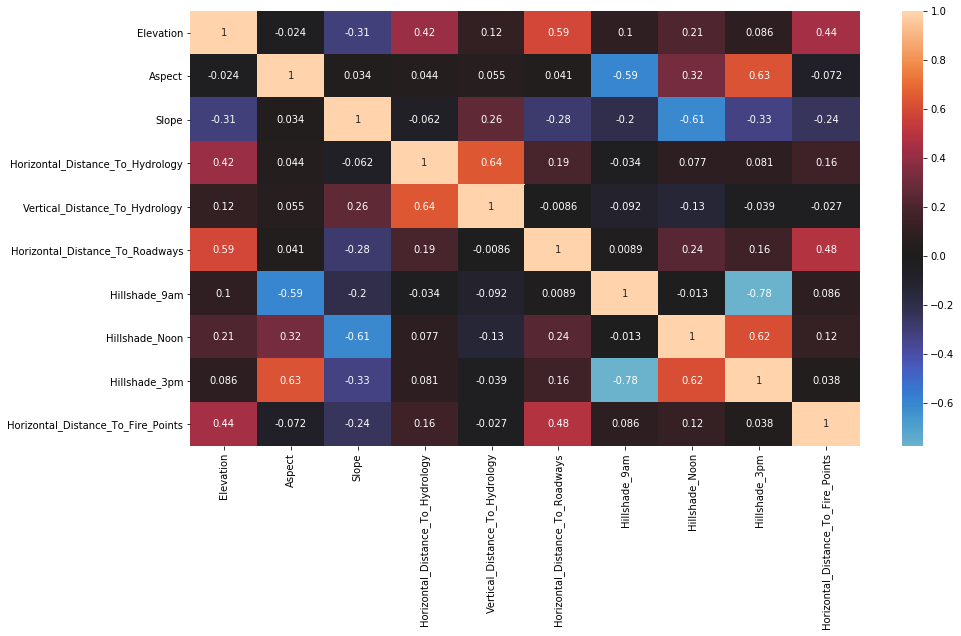

In [234]:
#Recheck heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cont_data_sampled.corr(), center=0, annot=True)

Correlated Data:
- Hillshade_3pm and Aspect (same as before)
- Hillshade_3pm and Hillshade_Noon (same as before)
- Elevation and Horizontal_Distance_To_Roadways (more correlated now, was at 0.37 before)
- Horizontal_Distance_to_Hydrology and Vertical_Distance_to_Hydrology (makes sense)
 

## Standardize Continuous Features

Standardize the data for modeling purposes.

In [254]:
#Instantiate StandardScaler
scaler = StandardScaler()

#Transform the training and test sets
scaled = scaler.fit_transform(cont_data_sampled)
scaled_cont_data = pd.DataFrame(scaled, columns=cont_data_sampled.columns, index=cont_data_sampled.index)

#Add on categorical data
data_sampled_cat = data_sampled.loc[:,'Wilderness_Area1':'Soil_Type40']
data_sampled_cat.head()

#Combined scaled cont data with categorical
data_sampled2 = pd.concat([scaled_cont_data, data_sampled_cat], axis=1)
data_sampled2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
67445,1.209444,-0.741239,-1.12753,0.650167,-0.035785,0.988923,0.502929,0.395451,-0.043098,2.903317,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
128508,0.958682,1.677536,-0.06931,-0.060658,-0.345936,1.144323,-0.870691,-0.170242,0.693244,1.427231,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
75226,0.535970,1.495673,-0.77479,-0.375520,-0.623440,2.311699,-0.609049,0.482481,0.888158,2.811460,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
526081,0.834496,0.986458,0.51859,0.960259,0.143777,1.181109,-1.655618,1.091689,1.797757,-0.011565,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
399807,1.369454,1.177413,-1.12753,2.057506,1.090556,-0.690447,-0.380113,0.917629,0.953129,-0.498137,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Train/Validate/Test Split

Create my train/validation/test sets for modeling

In [273]:
#Build feature and target dataframes
y = data_sampled['Cover_Type']
X = data_sampled.drop(['Cover_Type', 'Cover_Type_2'], axis=1)
X_sc = data_sampled2

(50001, 54)

In [0]:
#Create Train/Validation/Test sets for non scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [0]:
#Create Train/Validation/Test sets for scaled data
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y, test_size=0.2, random_state=42)
X_train_sc, X_val_sc, y_train_sc, y_val_sc  = train_test_split(X_train_sc, y_train_sc, test_size=0.2, random_state=42)

## Create Functions For Modeling

In this section I'll define the functions needed while exploring multiple models.

In [0]:
#Define a function to get metrics
def get_metrics(y_val, y_pred):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_val, y_pred, pos_label=None, average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_val, y_pred, pos_label=None,average='weighted')
    # harmonic mean of precision and recall
    f1 = f1_score(y_val, y_pred, pos_label=None, average='weighted')
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy, precision, recall, f1

In [0]:
#Define a function to plot Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

In [0]:
#Define a function to compute ROC curve and ROC area for each tree type class
def roc(y_val, y_score): 
  # Binarize the output
  y_val_bin = label_binarize(y_val, classes=[1, 2, 3, 4, 5, 6, 7])
  n_classes = y_val_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    plt.plot(fpr[i], tpr[i], color=color[i], lw=2, label="Type" + str(i+1))
    print('AUC for Cover Type {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

  plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic Curves')
  plt.legend()
  plt.show()
  return plt

In [0]:
#Define a function to review feature importance (pipeline)
def plot_feature_importances_pipe(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.named_steps['clf'].feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [0]:
#Define a function to review feature importance (Grid Search)
def plot_feature_importances_gs(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.best_estimator_.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [0]:
#Define a function to find the optimal number of neighbors in KNN
def find_best_k(X_train, y_train, X_val, y_val, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_val)
        accuracy, precision, recall, f1 = get_metrics(y_val, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

# Modeling

## Baseline Model: Random Forest (with default parameters)

I'll first run a random forest classifier on my data since it is a strong model to start out with that generally does pretty well.  

A random forest algorithm is an ensemble ML model that constructs a multitude of decision trees and outputs the class that is the mode of the classes or mean prediction of the individual trees. 

At this point, I am not standardizing my data for the random forest classifier.  I'll decide if that makes my model better after this baseline phase.

accuracy = 0.908, precision = 0.907, recall = 0.908, f1 = 0.907


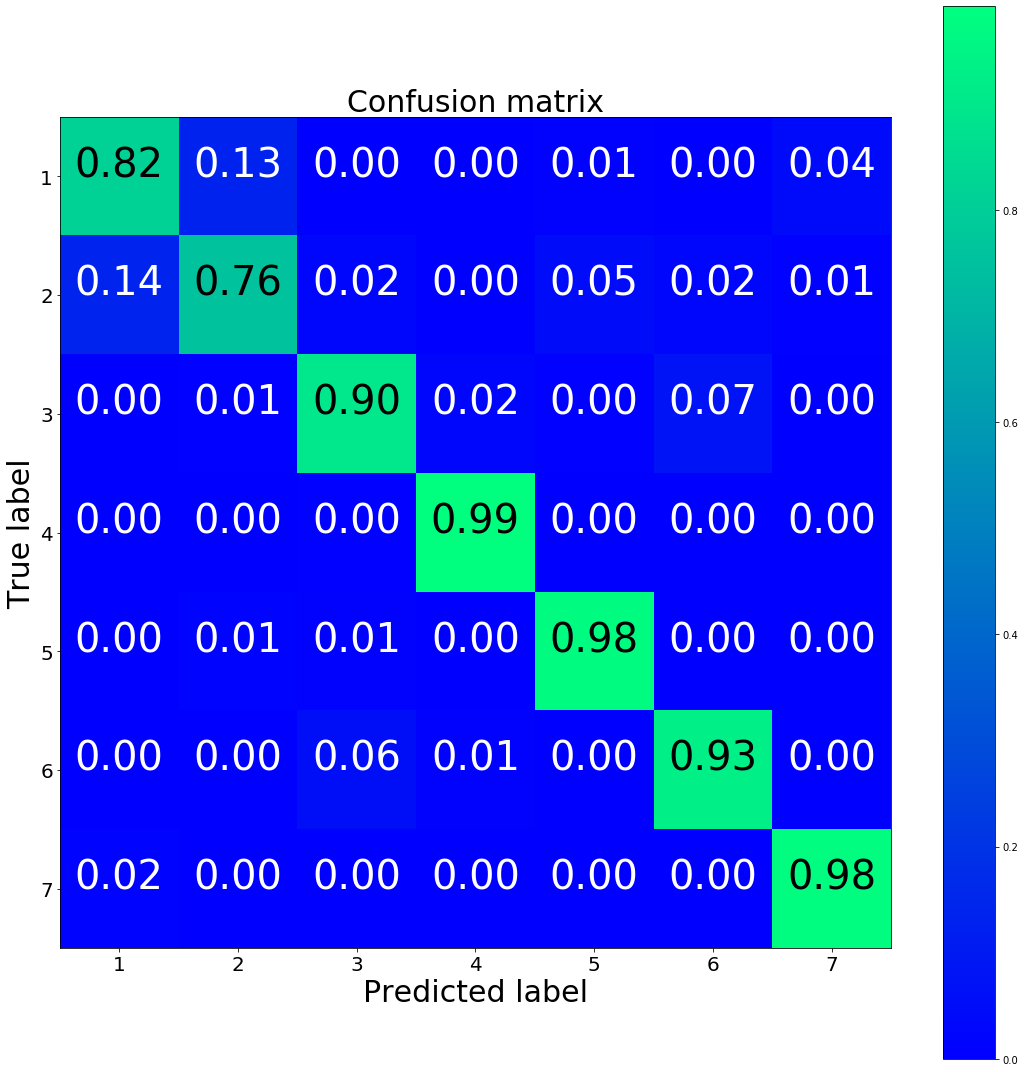

[[ 917  150    0    0    9    1   47]
 [ 161  859   27    0   57   22    8]
 [   0    6 1012   22    5   80    0]
 [   0    0    6 1206    0    4    0]
 [   1   16   10    0 1130    1    0]
 [   0    4   66   12    0 1056    0]
 [  17    1    0    0    0    0 1087]]
AUC for Cover Type 1: 0.984131974850892
AUC for Cover Type 2: 0.9764038708232319
AUC for Cover Type 3: 0.9939854868686868
AUC for Cover Type 4: 0.9997006428632387
AUC for Cover Type 5: 0.9985458225861905
AUC for Cover Type 6: 0.9955762332378362
AUC for Cover Type 7: 0.9993303561174567


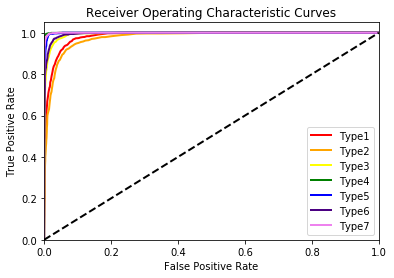

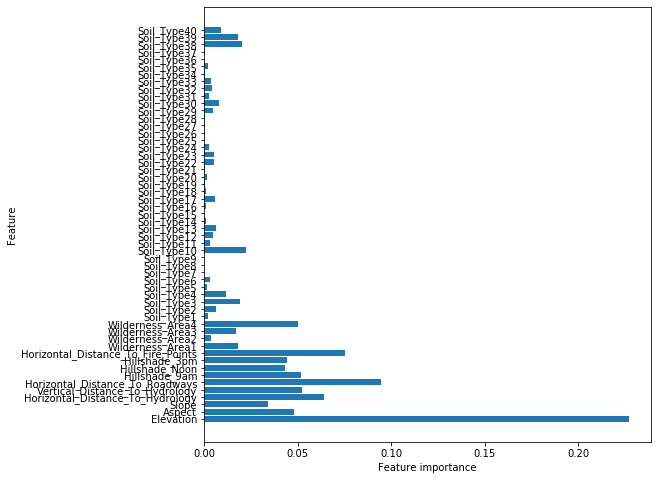

In [276]:
#Construct Pipeline. Random_state=123 to control randomness of bootstrapping 
#of samples used when building trees
pipe_rf_base = Pipeline([('clf', RandomForestClassifier(random_state=123))])
# Fit pipeline
rf_base = pipe_rf_base.fit(X_train, y_train)
#prediction
y_pred_rf_base = rf_base.predict(X_val)

#View metrics 
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_rf_base)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix 
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_rf_base)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

#Plot roc curve 
y_score_rf_base = rf_base.predict_proba(X_val)
roc(y_val, y_score_rf_base)

#Plot feature importance 
plot_feature_importances_pipe(rf_base)

Text(0.5, 0, 'Relative Importance')

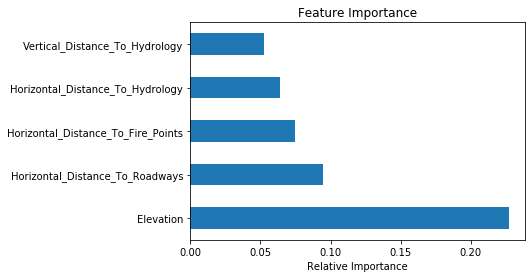

In [277]:
#Top 5 most important features
feat_importances = pd.Series(rf_base.named_steps['clf'].feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Relative Importance")

Results:
* This is a very strong baseline model with almost 91% accuracy!  
* We see mostly true positives in our confusion matrix here, however we see larger misclassification for Cover_Type's 1 with 2 and 6 with 3
* The ROC Curve is showing a very strong model with high AUC for each Cover_Type
* Again we see that Elevation is a very important feature for predicting tree cover type, followed by Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points

## Model #1: Support Vector Machine

I'll now look at a Nonlinear Support Vector Machine using a 3rd degree polynomial kernel to begin with (assuming my data is more complicated then having a linear kernel).  Since SVM is a distance-based classifier, if data is in different scales, then larger scaled features have a larger impact on the distance between points.  Therefore I need to use my scaled data.

In [278]:
#Construct model, include scaled data since SVMs are sensitive to feature scales
#coef0 controls how much the model is influenced by high degree polynomials vs low
poly_kernel_svm = SVC(kernel="poly", degree=3, coef0=1, C=5)
#Fit pipeline
model_svm = poly_kernel_svm.fit(X_train_sc, y_train_sc)

#Prediction
y_pred_svm = model_svm.predict(X_val_sc)

#View metrics
accuracy, precision, recall, f1 = get_metrics(y_val_sc, y_pred_svm)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

accuracy = 0.851, precision = 0.848, recall = 0.851, f1 = 0.848


Here I see 85% accuracy, less than the baseline Random Forest Model.  I'll perform a grid search on the hyperparameters to see if I can increase accuracy.

In [0]:
#Parameters for grid search
param_grid = {
    'kernel': ['rbf', 'poly' ],
    'degree': [3,4,5],
    'gamma': ['scale', 'auto'],
    'coef0': [1,2,3],
    'C': [5,10,15]
}

In [0]:
#Perform grid search
#grid_svm = GridSearchCV(SVC(), param_grid, cv=3, n_jobs=1)
#Fit grid
#grid_svm.fit(scaled_data_train, y_train)
#Best Parameters
#best_parameters = grid_svm.best_params_
#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))
#prediction
#y_pred_svm2 = grid_svm.predict(scaled_data_val)

#View metrics
#accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_svm2)
#print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
#                                                                       recall, f1))

Running the Grid Search above produces the following results:

Grid Search found the following optimal parameters: 
* C: 15
* coef0: 3
* degree: 5
* gamma: 'scale'
* kernel: 'poly'
* accuracy = 0.882, precision = 0.881, recall = 0.882, f1 = 0.881


accuracy = 0.882, precision = 0.881, recall = 0.882, f1 = 0.881


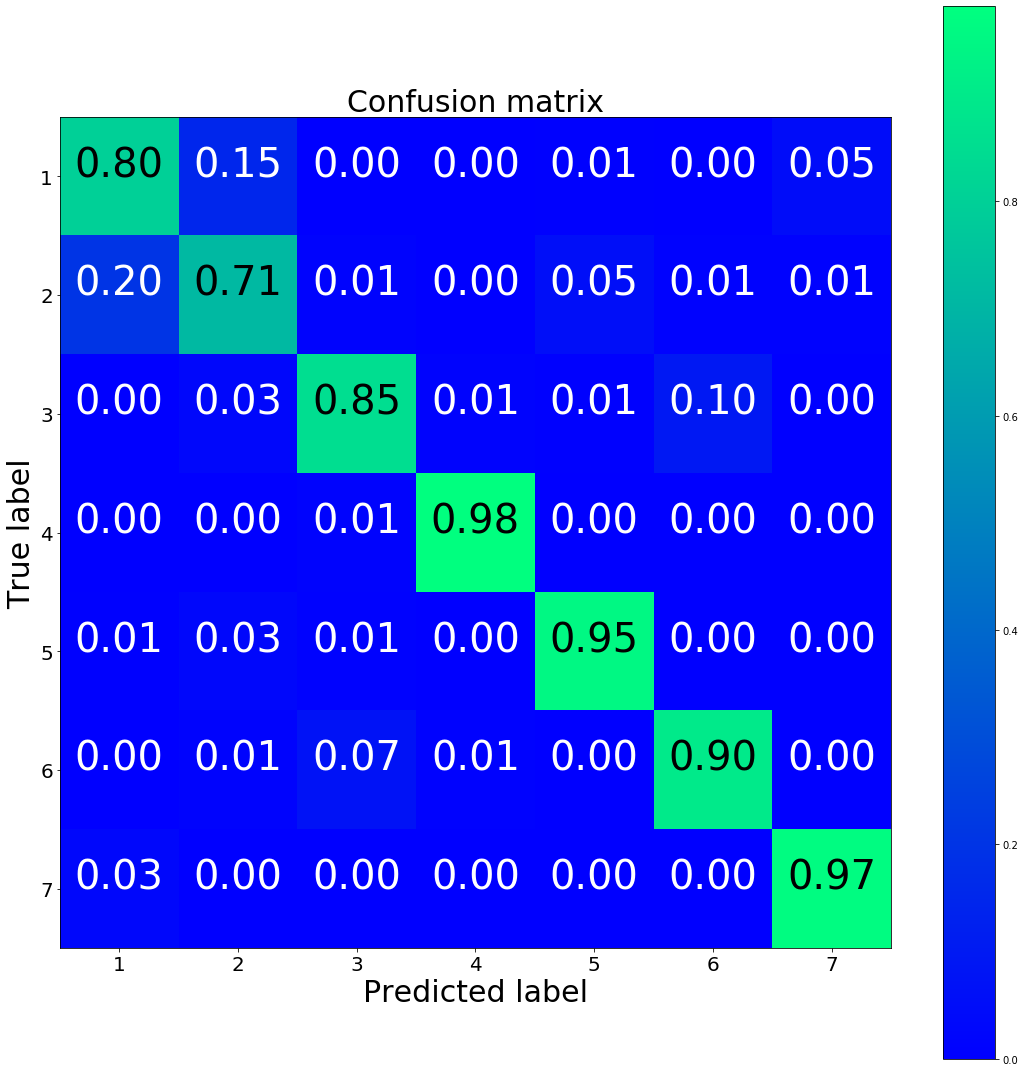

[[ 898  164    0    0    7    1   54]
 [ 229  808   16    0   61   11    9]
 [   0   34  961   16    7  107    0]
 [   0    0   18 1194    0    4    0]
 [   8   35   11    0 1102    2    0]
 [   4   16   80   11    4 1023    0]
 [  33    1    0    0    0    0 1071]]
AUC for Cover Type 1: 0.9463093300954994
AUC for Cover Type 2: 0.9272091192908748
AUC for Cover Type 3: 0.9702643070707071
AUC for Cover Type 4: 0.9988199061646599
AUC for Cover Type 5: 0.9929980123780834
AUC for Cover Type 6: 0.9810361333832589
AUC for Cover Type 7: 0.9973413746599772


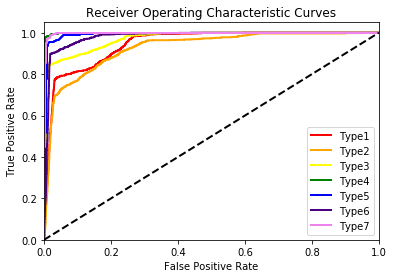

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [280]:
#Construct pipeline with parameters from grid search
poly_kernel_svm2 = SVC(kernel="poly", gamma = 'scale', degree=5, coef0=3, C=15)
# Fit pipeline
model_svm2 = poly_kernel_svm2.fit(X_train_sc, y_train_sc)
#Prediction
y_pred_svm2 = model_svm2.predict(X_val_sc)

#View metrics
accuracy, precision, recall, f1 = get_metrics(y_val_sc, y_pred_svm2)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix 
class_names = list(set(y))
cm = confusion_matrix(y_val_sc, y_pred_svm2)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

#Plot roc curve 
y_score_svm2 = model_svm2.decision_function(X_val_sc)
roc(y_val_sc, y_score_svm2)

These results are still less than I saw using the baseline random forest model and running the grid search for SVM is very cost expensive, so I will move on to looking at KNN's.  Please note, showing feature importance would only work if I used a linear kernel.  The poly kernel gave a better fit for the SVM, so I won't be showing a feature importance chart here.

## Model #2: KNN

Similar to SVM, since KNN is a distance-based classifier, if data is in different scales, then larger scaled features have a larger impact on the distance between points.  Therefore we have to scale it before running the model.  I'll begin by looking for the best number of neighbors for the model.

In [281]:
#Find the optimal value of K 
find_best_k(X_train_sc, y_train_sc, X_val_sc, y_val_sc)

Best Value for k: 1
F1-Score: 0.8739017578305156


Since the optimal value of K is 1 this means that the object is simply assigned to the class of that single nearest neighbor.  I'll dive right into a grid search for this model to find the best fit on the data.

In [0]:
#Parameters for grid search
param_grid = {
    'n_neighbors': [1],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

Grid Search found the following optimal parameters: 
metric: 'manhattan'
n_neighbors: 1
weights: 'uniform'
accuracy = 0.876, precision = 0.873, recall = 0.876, f1 = 0.874


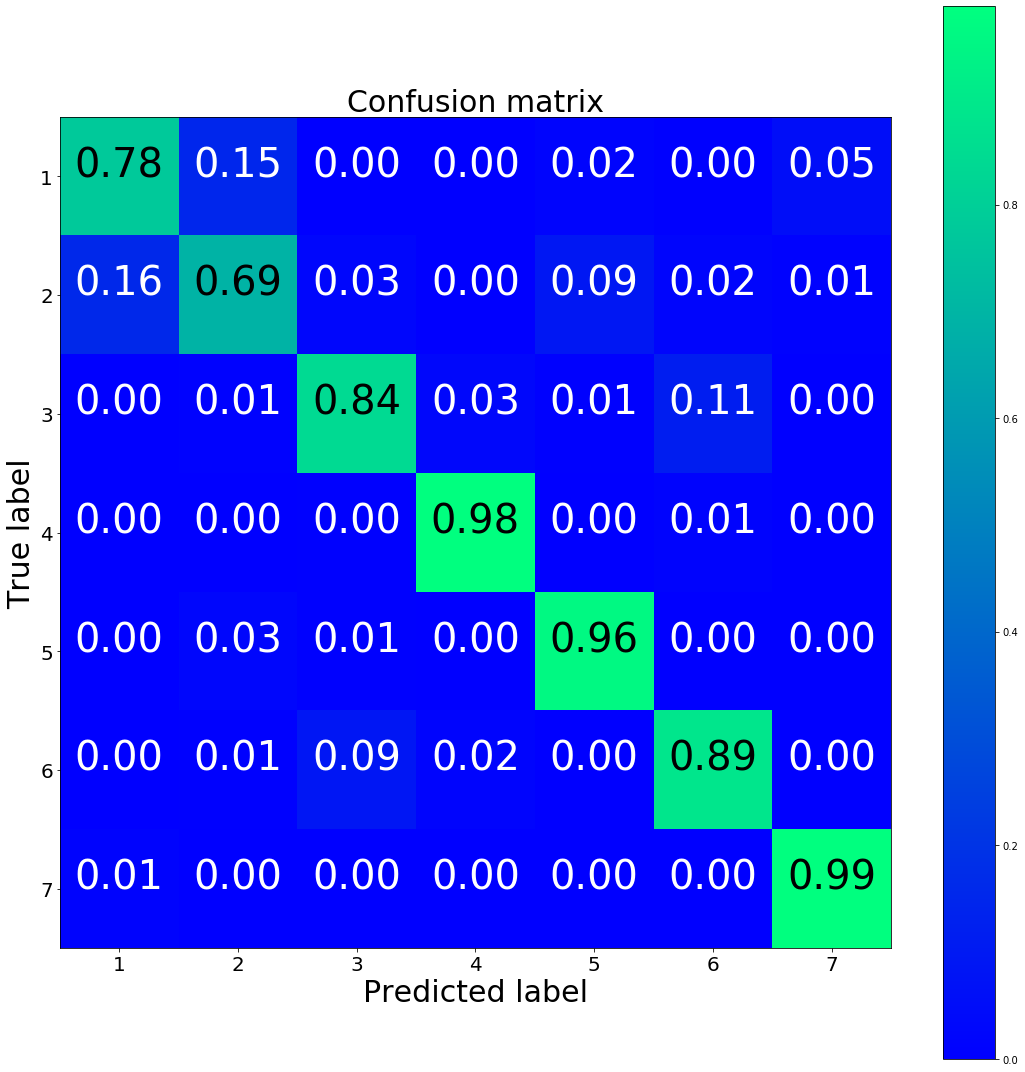

[[ 873  165    1    0   21    5   59]
 [ 179  784   29    1  102   26   13]
 [   1   10  945   33    8  128    0]
 [   0    0    6 1194    0   16    0]
 [   3   30    8    0 1114    3    0]
 [   1    8   99   20    1 1009    0]
 [  15    1    0    0    0    0 1089]]
AUC for Cover Type 1: 0.8738745732746217
AUC for Cover Type 2: 0.8300949750605056
AUC for Cover Type 3: 0.9095999999999999
AUC for Cover Type 4: 0.9869739945382323
AUC for Cover Type 5: 0.9713554248649129
AUC for Cover Type 6: 0.9303516372739198
AUC for Cover Type 7: 0.9875390062311531


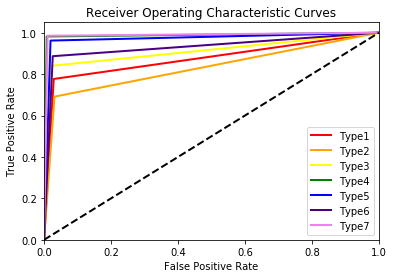

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [283]:
#Perform grid search
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, n_jobs=1)
#Fit grid
grid_knn.fit(X_train_sc, y_train_sc)
#Best parameters
best_parameters = grid_knn.best_params_
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
#Prediction
y_pred_knn = grid_knn.predict(X_val_sc)

#View metrics for KNN classifier
accuracy, precision, recall, f1 = get_metrics(y_val_sc, y_pred_knn)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix for SVM model
class_names = list(set(y))
cm = confusion_matrix(y_val_sc, y_pred_knn)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

# Compute ROC curve and ROC area for each tree type class
y_score_knn = grid_knn.predict_proba(X_val_sc)
roc(y_val_sc, y_score_knn)

Similar to the SVM model, feature importance is not defined for the KNN classifier.  

Results:

* KNN Classifier gives a final F1-Score of 87%, this is lower than Random Forest.  Next will try XGBoost.

## Model #3: XGBoost

I'll now look at a Boosting ensemble method with XGBoost, which is known to be a stronger model than Adaboost and Gradient Boosting.

In [284]:
#Construct pipeline, without scaler
pipe_xgb = Pipeline([('clf', XGBClassifier())])
#Fit pipeline
model_xgb = pipe_xgb.fit(X_train, y_train)
#Prediction
y_pred_xgb = model_xgb.predict(X_val)

#View metrics for XGBoost classifier
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_xgb)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

accuracy = 0.761, precision = 0.759, recall = 0.761, f1 = 0.753


This is the lowest accuracy I've seen so far at 75%, but I'll perform a grid search on the model to see if I can improve results

In [0]:
#Parameters for grid search
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7
accuracy = 0.893, precision = 0.891, recall = 0.893, f1 = 0.891


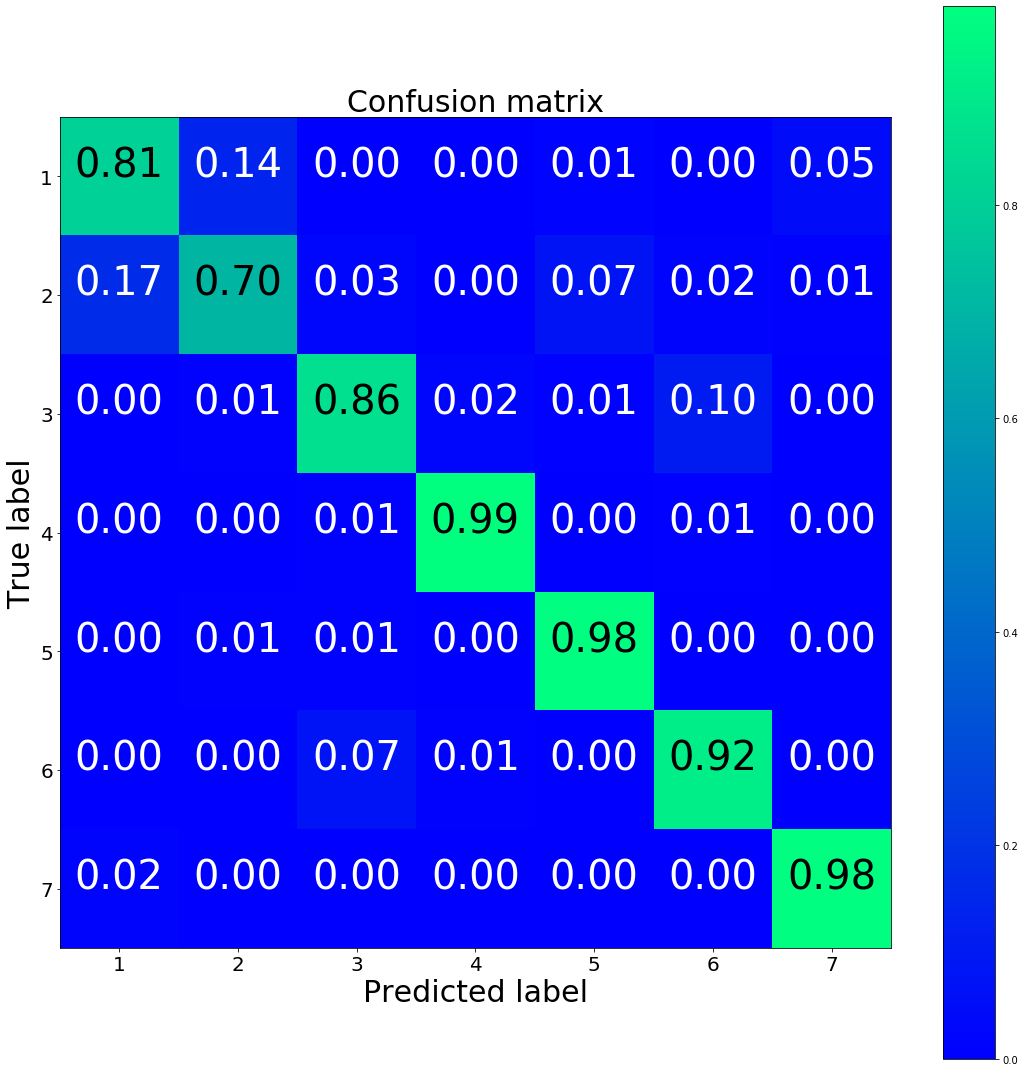

[[ 907  152    0    0   14    0   51]
 [ 191  799   30    0   85   19   10]
 [   0    9  973   22    8  113    0]
 [   0    0   10 1199    0    7    0]
 [   1    9    9    0 1136    3    0]
 [   0    1   80    9    1 1047    0]
 [  19    1    0    0    0    0 1085]]
AUC for Cover Type 1: 0.9813143969741573
AUC for Cover Type 2: 0.969746510551443
AUC for Cover Type 3: 0.9905821737373738
AUC for Cover Type 4: 0.9995328113362711
AUC for Cover Type 5: 0.99743128770335
AUC for Cover Type 6: 0.9941267437029995
AUC for Cover Type 7: 0.9992526553768716


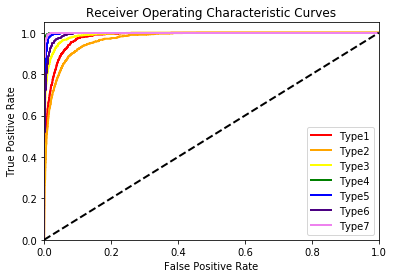

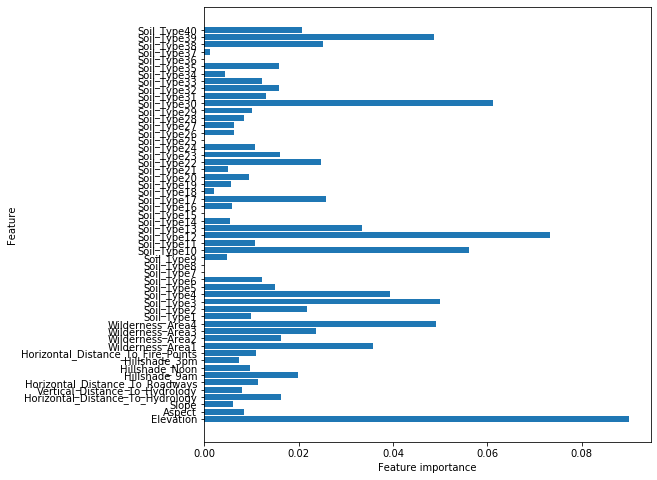

In [286]:
#Construct grid search
grid_xgb = GridSearchCV(XGBClassifier(), param_grid, cv=3, n_jobs=1)
#Fit grid
grid_xgb.fit(X_train, y_train)
#Best parameters
best_parameters = grid_xgb.best_params_
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
#Prediction
y_pred_xgb2 = grid_xgb.predict(X_val)

#View metrics for XGBoost classifier
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_xgb2)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix for SVM model
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_xgb2)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

# Compute ROC curve and ROC area for each tree type class
y_score_xgb = grid_xgb.predict_proba(X_val)
roc(y_val, y_score_xgb)

#Plot feature importance 
plot_feature_importances_gs(grid_xgb)

Text(0.5, 0, 'Relative Importance')

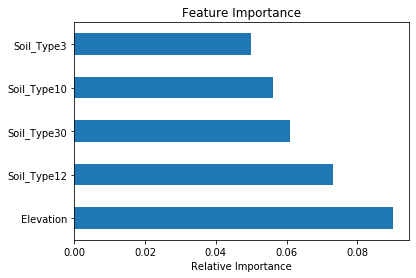

In [287]:
#Top 5 most important features
feat_importances = pd.Series(grid_xgb.best_estimator_.feature_importances_, 
                             index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Relative Importance")

Results:
* The metrics for XGBoost are still lower then we've seen in the Random Forest models, but now higher then the SVM and KNN classifiers.  Around 89% F1-Score.  

Grid Search found the following optimal parameters: 
* learning_rate: 0.2
* max_depth: 6
* min_child_weight: 1
* n_estimators: 100
* subsample: 0.7
* accuracy = 0.893, precision = 0.891, recall = 0.893, f1 = 0.891

I'll see if my model performs better using scaled data

In [288]:
#Construct pipeline, with scaler
pipe_xgb2 = Pipeline([('clf', XGBClassifier(learning_rate = 0.2, max_depth = 6, 
                                           min_child_weight = 1, n_estimators = 100,
                                           subsample = 0.7))])
#Fit pipeline
model_xgb2 = pipe_xgb2.fit(X_train_sc, y_train_sc)
#Prediction
y_pred_xgb2 = model_xgb2.predict(X_val_sc)

#View metrics for XGBoost classifier
accuracy, precision, recall, f1 = get_metrics(y_val_sc, y_pred_xgb2)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

accuracy = 0.893, precision = 0.891, recall = 0.893, f1 = 0.891


Using the scaled data does not give me better results.  

I can keep trying to tune the parameters to get higher accuracy, but the simpler way to go is with the baseline Random Forest Model that gave the highest accuracy and was quick to run.  I'll look into tuning the parameters for the Random Forest Classifier.

## Final Model: Random Forest 

As mentioned, it appears my baseline model using a Random Forest Classifier has been the strongest model.  
* I'll look into reducing dimensionality using an ExtraTreesClassifier, which is used for ensemble methods.  This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
* I'll also perform a grid search to see if I can improve results.

### Feature Engineering: ExtraTreesClassifier()

In [0]:
#Construct ExtraTreesClassifier
clf = ExtraTreesClassifier()
#Fit classifier
clf = clf.fit(X_train, y_train)
#Create model
model = SelectFromModel(clf, prefit=True)
#Transforem X_train
train_features = model.transform(X_train)
val_features = model.transform(X_val)
#See new shape
print(train_features.shape)

(32000, 17)


In [0]:
#Fit baseline pipeline with new features
rf_base_feat = pipe_rf_base.fit(train_features, y_train)
#Prediction with new features
y_pred_rf_base_feat = rf_base_feat.predict(val_features)

#View metrics 
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_rf_base_feat)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

accuracy = 0.907, precision = 0.905, recall = 0.907, f1 = 0.905


It looks like this made my fit slightly worse, so I'll go back to the original features and perform a grid search.

### Grid Search

In [0]:
#Parameters for grid search
param_grid = {'criterion': ['gini', 'entropy'],
   'min_samples_leaf': [1, 2],
   'min_samples_split': [2, 4],
   'n_estimators': [100, 500, 800]
}

Grid Search found the following optimal parameters: 
criterion: 'entropy'
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 800
accuracy = 0.910, precision = 0.909, recall = 0.910, f1 = 0.909


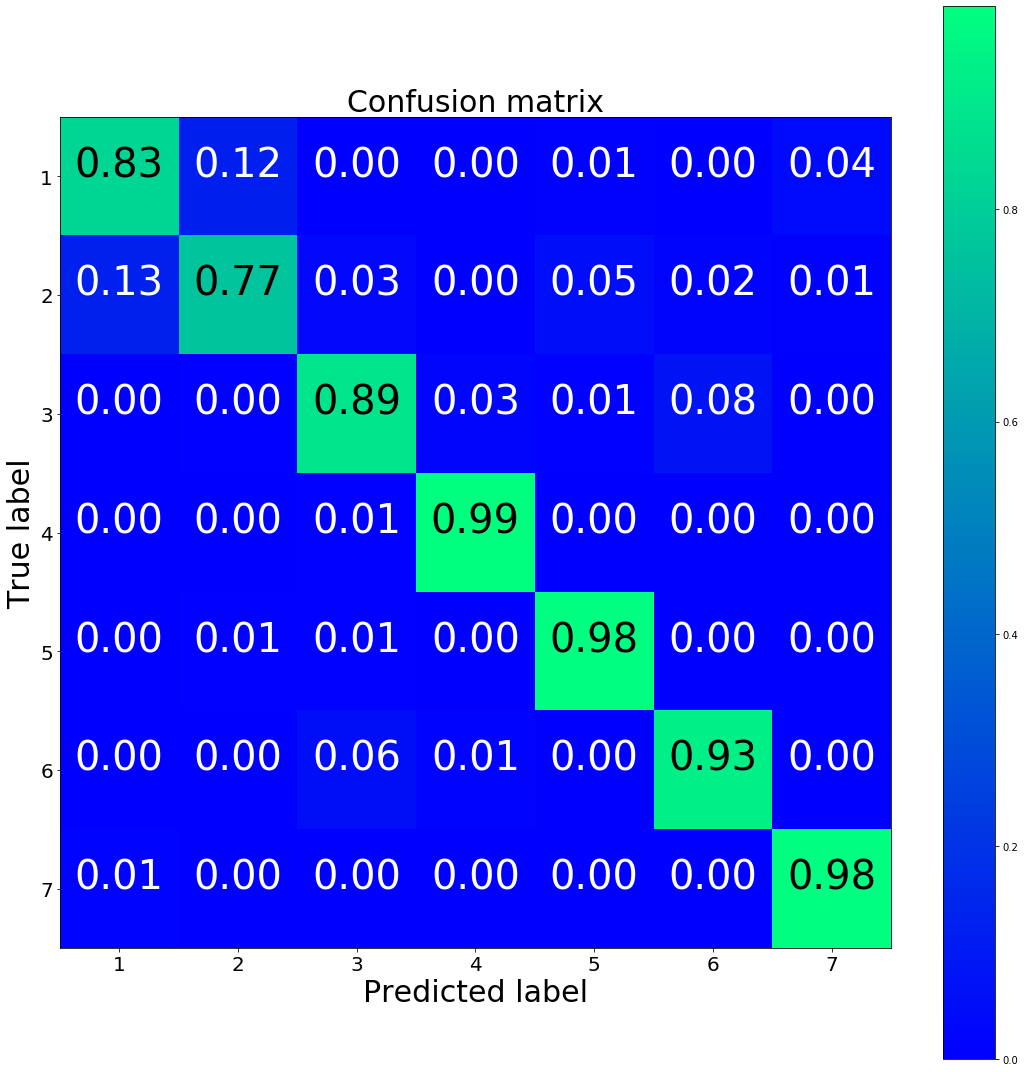

[[ 932  136    0    0   10    1   45]
 [ 145  868   31    0   60   21    9]
 [   0    5  998   30    6   86    0]
 [   0    0    7 1205    0    4    0]
 [   1    8    8    0 1139    2    0]
 [   0    4   66   14    0 1054    0]
 [  16    1    0    0    0    0 1088]]
AUC for Cover Type 1: 0.9851686406273614
AUC for Cover Type 2: 0.9780655619207905
AUC for Cover Type 3: 0.9941717333333333
AUC for Cover Type 4: 0.9996697313143932
AUC for Cover Type 5: 0.9987884063634193
AUC for Cover Type 6: 0.9958845971215614
AUC for Cover Type 7: 0.9993859410222503


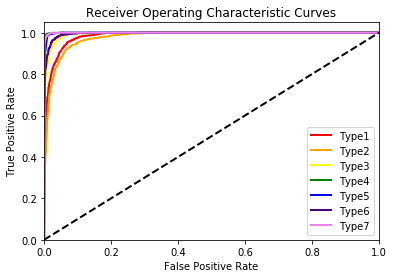

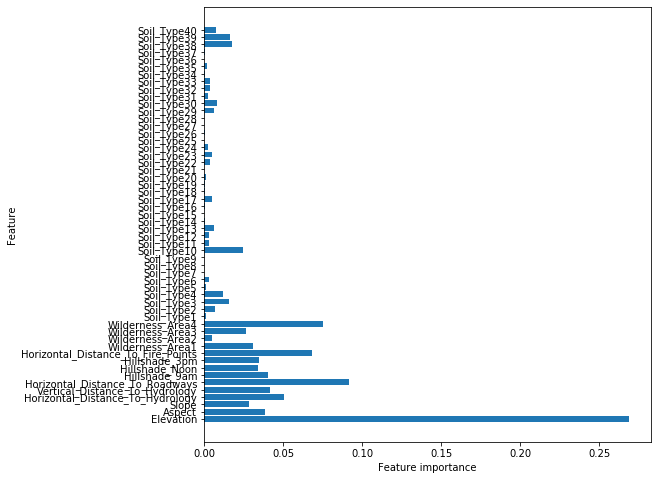

In [0]:
#Construct grid search
grid_rf = GridSearchCV(RandomForestClassifier(random_state=123), param_grid, cv=3, n_jobs=1)
# Fit grid 
grid_rf.fit(X_train, y_train)
#Best parameters
best_parameters = grid_rf.best_params_
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
#Prediction
y_pred_rf2 = grid_rf.predict(X_val)

#View metrics for XGBoost classifier
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_rf2)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix for SVM model
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_rf2)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

# Compute ROC curve and ROC area for each tree type class
y_score_rf = grid_rf.predict_proba(X_val)
roc(y_val, y_score_rf)

#Plot feature importance 
plot_feature_importances_gs(grid_rf)

Text(0.5, 0, 'Relative Importance')

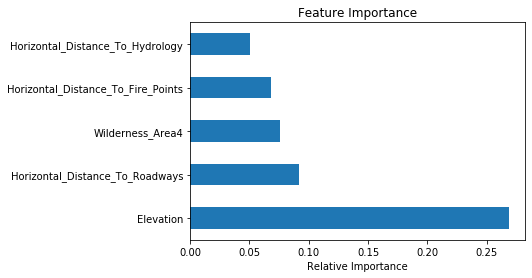

In [0]:
#Top 5 most important features
feat_importances = pd.Series(grid_rf.best_estimator_.feature_importances_, 
                             index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Relative Importance")

Results: 
* The Feature Importance for Random Forest mostly involves Elevation, where I see more of a mix for XGBoost (the boosting model) with some of the soil times being important features to predict Cover_Tree.  


Grid Search found the following optimal parameters: 
* criterion: 'entropy'
* min_samples_leaf: 1
* min_samples_split: 2
* n_estimators: 500
* accuracy = 0.909, precision = 0.908, recall = 0.909, f1 = 0.908

The baseline model was actually better then what I'm seeing here after using Grid Search

### Adding Scaler

accuracy = 0.908, precision = 0.906, recall = 0.908, f1 = 0.907


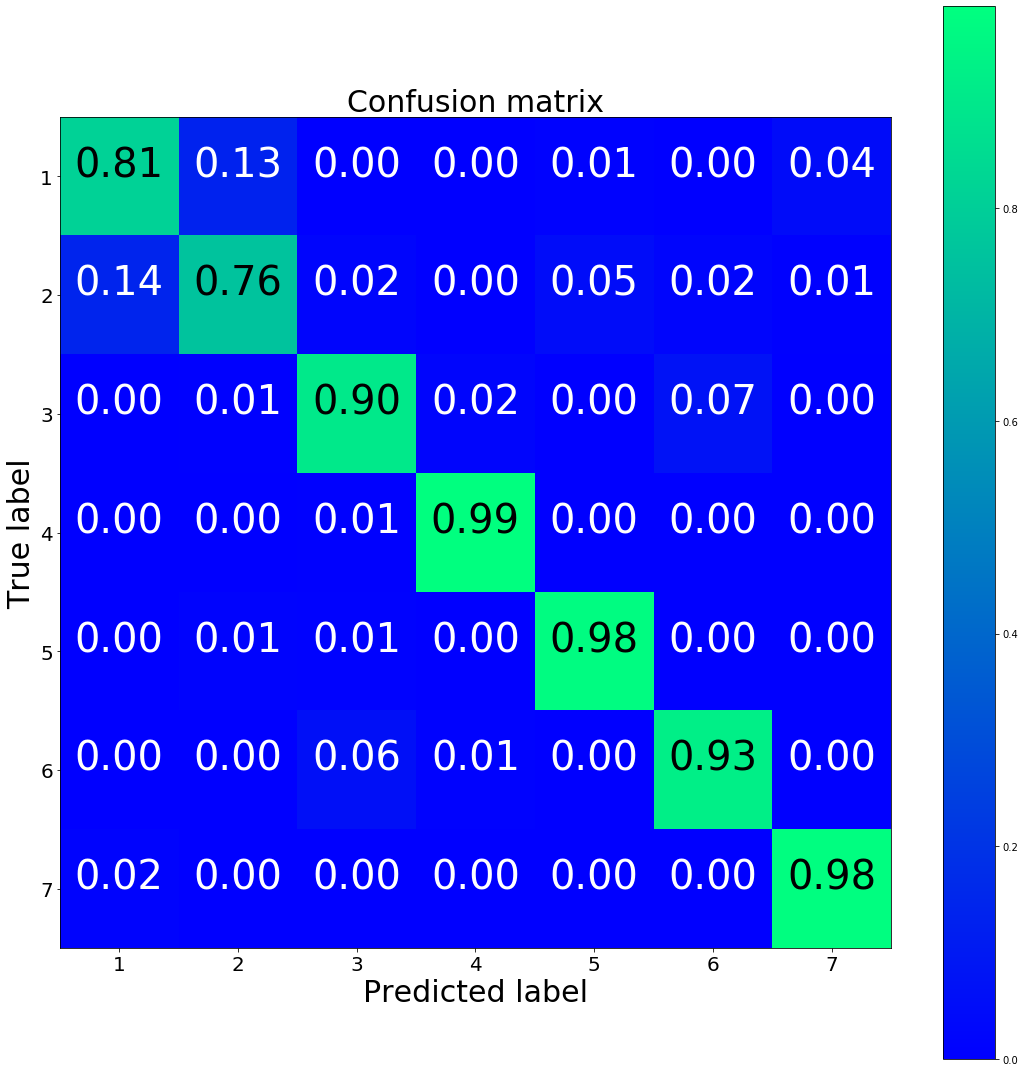

[[ 915  150    0    0    9    1   49]
 [ 160  861   26    0   57   22    8]
 [   0    6 1014   22    4   79    0]
 [   0    0    8 1204    0    4    0]
 [   1   16   10    0 1130    1    0]
 [   0    4   67   12    0 1055    0]
 [  17    1    0    0    0    0 1087]]
AUC for Cover Type 1: 0.9841392853372088
AUC for Cover Type 2: 0.9764166500985609
AUC for Cover Type 3: 0.9939783757575757
AUC for Cover Type 4: 0.9997033097419625
AUC for Cover Type 5: 0.99855831779636
AUC for Cover Type 6: 0.9955915361797403
AUC for Cover Type 7: 0.999322809170525


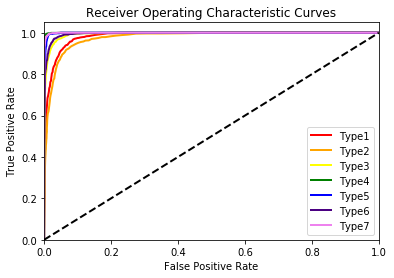

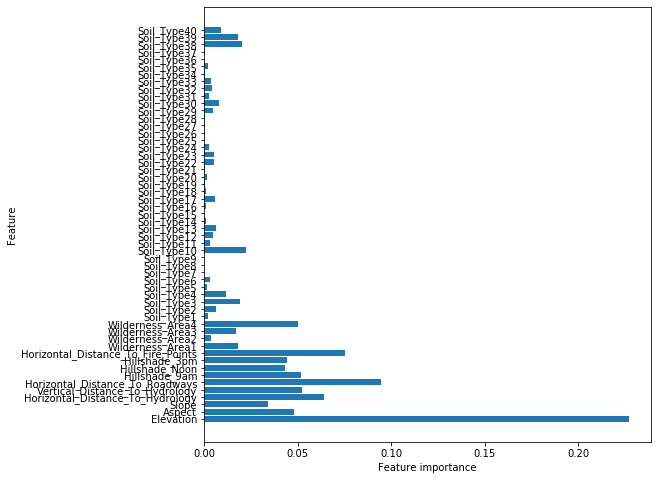

In [0]:
#Look at model using the Standard Scaler
# Fit the rf pipeline
model_rf_ss = pipe_rf_base.fit(scaled_data_train, y_train)
#prediction
y_pred_rf_ss = model_rf_ss.predict(scaled_data_val)

#View metrics for XGBoost classifier
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_rf_ss)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix for SVM model
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_rf_ss)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

# Compute ROC curve and ROC area for each tree type class
y_score_rf_ss = model_rf_ss.predict_proba(scaled_data_val)
roc(y_val, y_score_rf_ss)

#Plot feature importance 
plot_feature_importances_pipe(model_rf_ss)

Text(0.5, 0, 'Relative Importance')

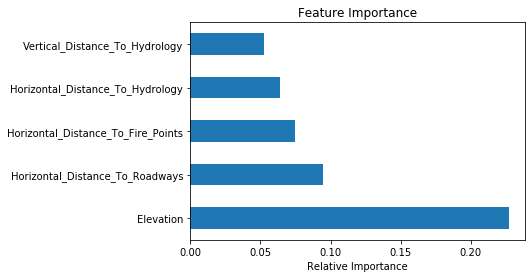

In [0]:
#Top 5 most important features
feat_importances = pd.Series(model_rf_ss.named_steps['clf'].feature_importances_, 
                             index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Relative Importance")

# Final Model on Test Data

In [0]:
#Transform the training and test sets
scaled_data_test = scaler.fit_transform(X_test)

#Prediction
y_pred_rf_final = rf_base.predict(scaled_data_test)

#View metrics 
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_rf_final)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix 
class_names = list(set(y))
cm = confusion_matrix(y_test, y_pred_rf_final)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

#Plot roc curve 
y_score_rf_final= rf_base.predict_proba(scaled_data_test)
roc(y_test, y_score_rf_final)

#Plot feature importance 
plot_feature_importances_pipe(rf_base)

# Conclusion